In [ ]:
!pip install qutip
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

     |████████████████████████████████| 14.6MB 257kB/s 


**Evolution under Constant Intensity field** (using density matrix formalism and Quantum Trajectory approach) 

10.0%. Run time:   4.33s. Est. time left: 00:00:00:38
20.0%. Run time:   8.24s. Est. time left: 00:00:00:32
30.0%. Run time:  12.75s. Est. time left: 00:00:00:29
40.0%. Run time:  16.70s. Est. time left: 00:00:00:25
50.0%. Run time:  20.79s. Est. time left: 00:00:00:20
60.0%. Run time:  25.02s. Est. time left: 00:00:00:16
70.0%. Run time:  29.36s. Est. time left: 00:00:00:12
80.0%. Run time:  33.97s. Est. time left: 00:00:00:08
90.0%. Run time:  38.48s. Est. time left: 00:00:00:04
Total run time:  42.97s


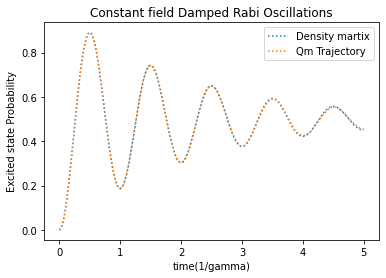

In [ ]:
omega = 2*np.pi     #Rabi frequency (arbitrary value chosen)
gamma = omega/10    #Relaxation constant
psi0 = basis(2,0)   #Initially in ground

times = np.linspace(0.0, 5.0, 200)
psi_g = basis(2,0)
psi_e = basis(2,1)
a  = psi_g*psi_e.dag()
H = (omega/2)*(psi_g*psi_e.dag() + psi_e*psi_g.dag()) 

# using Density matrix formalism
data_dm = mesolve(H, psi0, times, [np.sqrt(gamma) * a], [psi_g*psi_g.dag() , psi_e*psi_e.dag()])
                                #Collapse operator

# using Quantum Trajectory approach
data_qt = mcsolve(H, psi0, times, [np.sqrt(gamma) * a], [psi_g*psi_g.dag() , psi_e*psi_e.dag()], ntraj=5000)
                                #Collapse operator


plt.figure()
plt.plot(times, data_dm.expect[1], linestyle = 'dotted')
plt.plot(times, data_qt.expect[1], linestyle = 'dotted')
plt.title('Constant field Damped Rabi Oscillations')
plt.xlabel('time(1/gamma)')
plt.ylabel('Excited state Probability')
plt.legend(('Density martix','Qm Trajectory'))
plt.show()

**Evolution under Constant Intensity field**  (using Quantum Trajectory approach)

10.0%. Run time:   3.85s. Est. time left: 00:00:00:34
20.0%. Run time:   8.50s. Est. time left: 00:00:00:33
30.0%. Run time:  12.78s. Est. time left: 00:00:00:29
40.0%. Run time:  17.04s. Est. time left: 00:00:00:25
50.0%. Run time:  20.99s. Est. time left: 00:00:00:20
60.0%. Run time:  24.83s. Est. time left: 00:00:00:16
70.0%. Run time:  28.67s. Est. time left: 00:00:00:12
80.0%. Run time:  33.19s. Est. time left: 00:00:00:08
90.0%. Run time:  37.55s. Est. time left: 00:00:00:04
Total run time:  41.63s


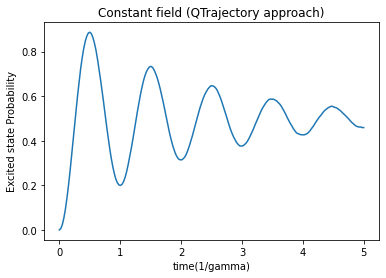

In [ ]:
omega = 2*np.pi     #Rabi frequency (arbitrary value chosen)
gamma = omega/10    #Relaxation constant
psi0 = basis(2,0)   #Initially in ground

times = np.linspace(0.0, 5.0, 200)
psi_g = basis(2,0)
psi_e = basis(2,1)
a  = psi_g*psi_e.dag()
H = (omega/2)*(psi_g*psi_e.dag() + psi_e*psi_g.dag()) 

data = mcsolve(H, psi0, times, [np.sqrt(gamma) * a], [psi_g*psi_g.dag() , psi_e*psi_e.dag()], ntraj=5000)
                                #Collapse operator

plt.figure()
plt.plot(times, data.expect[1])
plt.title('Constant field (QTrajectory approach)')
plt.xlabel('time(1/gamma)')
plt.ylabel('Excited state Probability')
plt.show()

**Evolution under short Gaussian field**  (using Quantum Trajectory approach)


*   n-pi pulse
*   FWHM = (Relaxation time)/10



Total run time:   0.03s


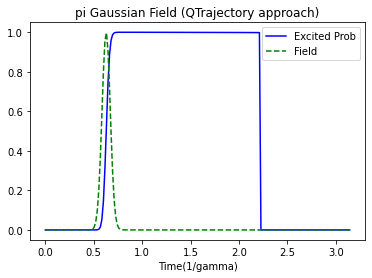

[array([3.5270562])]
1


In [ ]:
n=1;                         #n-pi pulse
gamma = 2*np.pi/10           #Relaxation constant (arbitrary value chosen)
psi0 = basis(2,0)            #Initially in ground

times = np.linspace(0.0, 5.0, 200)
psi_g = basis(2,0)
psi_e = basis(2,1)
a  = psi_g*psi_e.dag()

H0 = Qobj([[0,0],[0,0]])                            #time-independent comp. of H

H1 = (1/2)*(psi_g*psi_e.dag() + psi_e*psi_g.dag())  #time-dependent comp. of H
def H1_coeff(t, args):
    return (20*n*gamma*np.sqrt(np.pi*np.log(2))) * np.exp(-(20*gamma*np.sqrt(np.log(2))*(t-1)) ** 2)
            # Rabi freq.(t) [ for n-pi Gaussian pulse with FWHM = 1/(10*gamma) ]

H = [H0,[H1, H1_coeff]]

data = mcsolve(H, psi0, times, [np.sqrt(gamma) * a], [psi_g*psi_g.dag() , psi_e*psi_e.dag()], ntraj=1)
                                #Collapse operator

plt.figure()
plt.plot(times*gamma, data.expect[1],'b', linestyle = 'solid')
plt.plot(times*gamma,np.exp(-(20*gamma*np.sqrt(np.log(2))*(times-1)) ** 2),'g', linestyle = 'dashed')
plt.title('pi Gaussian Field (QTrajectory approach)')
plt.xlabel('Time(1/gamma)')
plt.legend(("Excited Prob", "Field"))
plt.show()

print(data.col_times)

print(len(data.col_times[0]))

10.0%. Run time:  22.50s. Est. time left: 00:00:03:22
20.0%. Run time:  45.95s. Est. time left: 00:00:03:03
30.0%. Run time:  67.47s. Est. time left: 00:00:02:37
40.0%. Run time:  90.08s. Est. time left: 00:00:02:15
50.0%. Run time: 112.64s. Est. time left: 00:00:01:52
60.0%. Run time: 134.77s. Est. time left: 00:00:01:29
70.0%. Run time: 156.11s. Est. time left: 00:00:01:06
80.0%. Run time: 178.06s. Est. time left: 00:00:00:44
90.0%. Run time: 200.09s. Est. time left: 00:00:00:22
Total run time: 220.81s


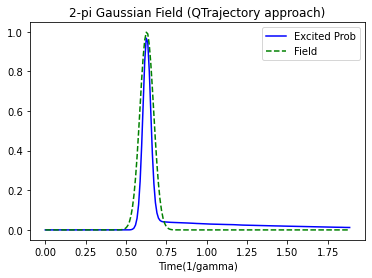

In [ ]:
n=2;                         #n-pi pulse
gamma = 2*np.pi/10           #Relaxation constant (arbitrary value chosen)
psi0 = basis(2,0)            #Initially in ground

times = np.linspace(0.0, 3.0, 200)
psi_g = basis(2,0)
psi_e = basis(2,1)
a  = psi_g*psi_e.dag()

H0 = Qobj([[0,0],[0,0]])                            #time-independent comp. of H

H1 = (1/2)*(psi_g*psi_e.dag() + psi_e*psi_g.dag())  #time-dependent comp. of H
def H1_coeff(t, args):
    return (20*n*gamma*np.sqrt(np.pi*np.log(2))) * np.exp(-(20*gamma*np.sqrt(np.log(2))*(t-1)) ** 2)
            # Rabi freq.(t) [ for n-pi Gaussian pulse with FWHM = 1/(10*gamma) ]

H = [H0,[H1, H1_coeff]]

data = mcsolve(H, psi0, times, [np.sqrt(gamma) * a], [psi_g*psi_g.dag() , psi_e*psi_e.dag()], ntraj=10000)
                                #Collapse operator

plt.figure()
plt.plot(times*gamma, data.expect[1],'b', linestyle = 'solid')
plt.plot(times*gamma,np.exp(-(20*gamma*np.sqrt(np.log(2))*(times-1)) ** 2),'g', linestyle = 'dashed')
plt.title('2-pi Gaussian Field (QTrajectory approach)')
plt.xlabel('Time(1/gamma)')
plt.legend(("Excited Prob", "Field"))
plt.show()


10.0%. Run time:  23.32s. Est. time left: 00:00:03:29
20.0%. Run time:  44.35s. Est. time left: 00:00:02:57
30.0%. Run time:  64.34s. Est. time left: 00:00:02:30
40.0%. Run time:  85.13s. Est. time left: 00:00:02:07
50.0%. Run time: 105.51s. Est. time left: 00:00:01:45
60.0%. Run time: 126.88s. Est. time left: 00:00:01:24
70.0%. Run time: 147.92s. Est. time left: 00:00:01:03
80.0%. Run time: 168.94s. Est. time left: 00:00:00:42
90.0%. Run time: 189.04s. Est. time left: 00:00:00:21
Total run time: 209.78s


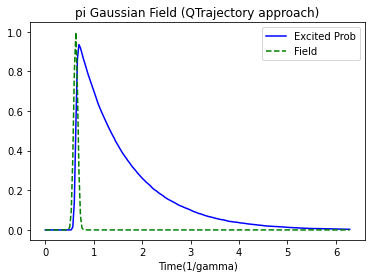

E_n 1.0098
[0.003499999999999998, 0.983199999999908, 0.013299999999999975, 0, 0]


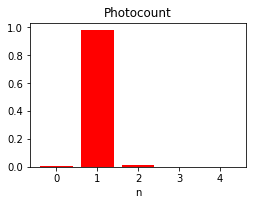

In [ ]:
n=1;                         #n-pi pulse
num_traj = 10000              #Number of trajectories                    
gamma = 2*np.pi/10           #Relaxation constant (arbitrary value chosen)
psi0 = basis(2,0)            #Initially in ground

times = np.linspace(0.0, 10.0, 200)
psi_g = basis(2,0)
psi_e = basis(2,1)
a  = psi_g*psi_e.dag()

H0 = Qobj([[0,0],[0,0]])                            #time-independent comp. of H

H1 = (1/2)*(psi_g*psi_e.dag() + psi_e*psi_g.dag())  #time-dependent comp. of H
def H1_coeff(t, args):
    return (20*n*gamma*np.sqrt(np.pi*np.log(2))) * np.exp(-(20*gamma*np.sqrt(np.log(2))*(t-1)) ** 2)
            # Rabi freq.(t) [ for n-pi Gaussian pulse with FWHM = 1/(10*gamma) ]

H = [H0,[H1, H1_coeff]]

data = mcsolve(H, psi0, times, [np.sqrt(gamma) * a], [psi_g*psi_g.dag() , psi_e*psi_e.dag()], ntraj=num_traj)
                                #Collapse operator

plt.figure()
plt.plot(times*gamma, data.expect[1],'b', linestyle = 'solid')
plt.plot(times*gamma,np.exp(-(20*gamma*np.sqrt(np.log(2))*(times-1)) ** 2),'g', linestyle = 'dashed')
plt.title('pi Gaussian Field (QTrajectory approach)')
plt.xlabel('Time(1/gamma)')
plt.legend(("Excited Prob", "Field"))
plt.show()

total_col = 0
x_P_n = [0,1,2,3,4]
P_n = [0,0,0,0,0]                             #Photocount


for x in data.col_times:
  total_col += len(x)
  for y in range(6):
    if len(x) == y:
      P_n[y] += 1/num_traj

E_n = total_col/num_traj        #Expected no. of emissions
print("E_n", E_n)

print(P_n)

fig = plt.figure(figsize=(3,2))
ax = fig.add_axes([0,0,1,1])
ax.bar(x_P_n,P_n,color='red')
plt.title('Photocount')
plt.xlabel('n')
plt.show()



10.0%. Run time:  24.85s. Est. time left: 00:00:03:43
20.0%. Run time:  49.25s. Est. time left: 00:00:03:17
30.0%. Run time:  74.75s. Est. time left: 00:00:02:54
40.0%. Run time:  98.60s. Est. time left: 00:00:02:27
50.0%. Run time: 122.92s. Est. time left: 00:00:02:02
60.0%. Run time: 146.28s. Est. time left: 00:00:01:37
70.0%. Run time: 170.35s. Est. time left: 00:00:01:13
80.0%. Run time: 194.17s. Est. time left: 00:00:00:48
90.0%. Run time: 219.75s. Est. time left: 00:00:00:24
Total run time: 243.36s


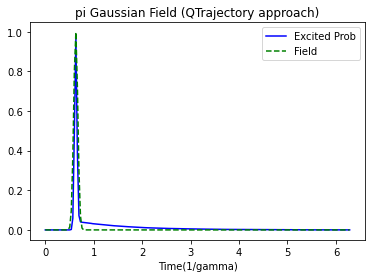

E_n 0.0991
[0.9411999999999127, 0.01919999999999994, 0.03890000000000009, 0.0007000000000000001, 0]


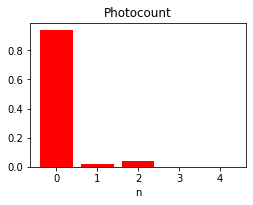

In [ ]:
n=2;                         #n-pi pulse
num_traj = 10000               #Number of trajectories                    
gamma = 2*np.pi/10           #Relaxation constant (arbitrary value chosen)
psi0 = basis(2,0)            #Initially in ground

times = np.linspace(0.0, 10.0, 200)
psi_g = basis(2,0)
psi_e = basis(2,1)
a  = psi_g*psi_e.dag()

H0 = Qobj([[0,0],[0,0]])                            #time-independent comp. of H

H1 = (1/2)*(psi_g*psi_e.dag() + psi_e*psi_g.dag())  #time-dependent comp. of H
def H1_coeff(t, args):
    return (20*n*gamma*np.sqrt(np.pi*np.log(2))) * np.exp(-(20*gamma*np.sqrt(np.log(2))*(t-1)) ** 2)
            # Rabi freq.(t) [ for n-pi Gaussian pulse with FWHM = 1/(10*gamma) ]

H = [H0,[H1, H1_coeff]]

data = mcsolve(H, psi0, times, [np.sqrt(gamma) * a], [psi_g*psi_g.dag() , psi_e*psi_e.dag()], ntraj=num_traj)
                                #Collapse operator

plt.figure()
plt.plot(times*gamma, data.expect[1],'b', linestyle = 'solid')
plt.plot(times*gamma,np.exp(-(20*gamma*np.sqrt(np.log(2))*(times-1)) ** 2),'g', linestyle = 'dashed')
plt.title('pi Gaussian Field (QTrajectory approach)')
plt.xlabel('Time(1/gamma)')
plt.legend(("Excited Prob", "Field"))
plt.show()

total_col = 0
x_P_n = [0,1,2,3,4]
P_n = [0,0,0,0,0]                             #Photocount


for x in data.col_times:
  total_col += len(x)
  for y in range(6):
    if len(x) == y:
      P_n[y] += 1/num_traj

E_n = total_col/num_traj        #Expected no. of emissions
print("E_n", E_n)

print(P_n)

fig = plt.figure(figsize=(3,2))
ax = fig.add_axes([0,0,1,1])
ax.bar(x_P_n,P_n,color='red')
plt.title('Photocount')
plt.xlabel('n')
plt.show()



10.0%. Run time:   4.09s. Est. time left: 00:00:00:36
20.0%. Run time:   7.72s. Est. time left: 00:00:00:30
30.0%. Run time:  11.09s. Est. time left: 00:00:00:25
40.0%. Run time:  14.77s. Est. time left: 00:00:00:22
50.0%. Run time:  18.63s. Est. time left: 00:00:00:18
60.0%. Run time:  22.12s. Est. time left: 00:00:00:14
70.0%. Run time:  25.51s. Est. time left: 00:00:00:10
80.0%. Run time:  28.48s. Est. time left: 00:00:00:07
90.0%. Run time:  32.19s. Est. time left: 00:00:00:03
Total run time:  35.75s
10.0%. Run time:   4.94s. Est. time left: 00:00:00:44
20.0%. Run time:  10.67s. Est. time left: 00:00:00:42
30.0%. Run time:  16.91s. Est. time left: 00:00:00:39
40.0%. Run time:  22.35s. Est. time left: 00:00:00:33
50.0%. Run time:  27.84s. Est. time left: 00:00:00:27
60.0%. Run time:  33.16s. Est. time left: 00:00:00:22
70.0%. Run time:  38.06s. Est. time left: 00:00:00:16
80.0%. Run time:  43.66s. Est. time left: 00:00:00:10
90.0%. Run time:  48.66s. Est. time left: 00:00:00:05
Tota

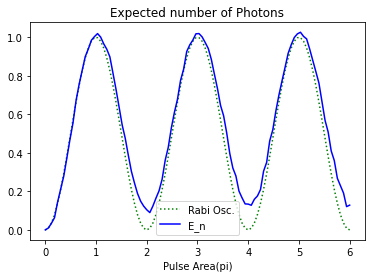

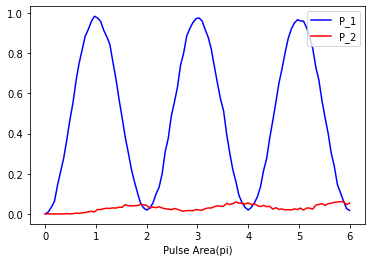

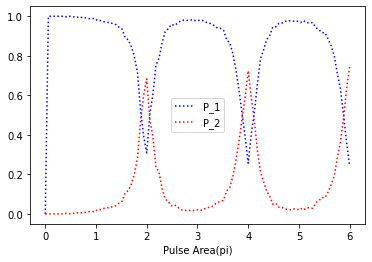

In [ ]:
possible_n = np.linspace(0,6,100)   #possible n-pi pulse

E_n = [0,0]
E_n.clear()
P_0 = [0,0]
P_0.clear()
P_1 = [0,0]
P_1.clear()
P_2 = [0,0]
P_2.clear()

num_traj = 2000              #Number of trajectories                    
gamma = 2*np.pi/10           #Relaxation constant (arbitrary value chosen)
psi0 = basis(2,0)            #Initially in ground

times = np.linspace(0.0, 10.0, 200)
psi_g = basis(2,0)
psi_e = basis(2,1)
a  = psi_g*psi_e.dag()

H0 = Qobj([[0,0],[0,0]])                            #time-independent comp. of H
H1 = (1/2)*(psi_g*psi_e.dag() + psi_e*psi_g.dag())  #time-dependent comp. of H

for n in possible_n:           

  def H1_coeff(t, args):
      return (20*n*gamma*np.sqrt(np.pi*np.log(2))) * np.exp(-(20*gamma*np.sqrt(np.log(2))*(t-1)) ** 2)
              # Rabi freq.(t) [ for n-pi Gaussian pulse with FWHM = 1/(10*gamma) ]

  H = [H0,[H1, H1_coeff]]

  data = mcsolve(H, psi0, times, [np.sqrt(gamma) * a], [psi_g*psi_g.dag() , psi_e*psi_e.dag()], ntraj=num_traj)
                                  #Collapse operator

  total_col = 0
  P_n = [0,0,0]                         #Photocount

  for x in data.col_times:
    total_col += len(x)
    for y in range(0,3):
      if len(x) == y:
        P_n[y] += 1/num_traj

  E_n.append(total_col/num_traj)        #Expected no. of emissions
  P_0.append(P_n[0])
  P_1.append(P_n[1])
  P_2.append(P_n[2])

plt.figure()
plt.plot(possible_n, (1-np.cos(np.pi*possible_n))/2,'g', linestyle = 'dotted')
plt.plot(possible_n, E_n,'b', linestyle = 'solid')
plt.title('Expected number of Photons')
plt.xlabel('Pulse Area(pi)')
plt.legend(("Rabi Osc.", "E_n"))
plt.show()

plt.figure()
plt.plot(possible_n, P_1,'b', linestyle = 'solid')
plt.plot(possible_n, P_2,'r', linestyle = 'solid')
plt.xlabel('Pulse Area(pi)')
plt.legend(("P_1", "P_2"))
plt.show()

Pi_1 = [0,0]
Pi_1.clear()
Pi_2 = [0,0]
Pi_2.clear()

for i in range(0,len(P_1)):
  Pi_1.append(P_1[i]/(1-P_0[i]))
  Pi_2.append(P_2[i]/(1-P_0[i]))

plt.figure()
plt.plot(possible_n, Pi_1,'b', linestyle = 'dotted')
plt.plot(possible_n, Pi_2,'r', linestyle = 'dotted')
plt.xlabel('Pulse Area(pi)')
plt.legend(("Pi_1", "Pi_2"))
plt.show()

In [ ]:
possible_n = np.linspace(0,6,100)   #possible n-pi pulse

E_n = [0,0]
E_n.clear()
E_n2 = [0,0]
E_n2.clear()

num_traj = 2000              #Number of trajectories                    
gamma = 2*np.pi/10           #Relaxation constant (arbitrary value chosen)
psi0 = basis(2,0)            #Initially in ground

times = np.linspace(0.0, 10.0, 200)
psi_g = basis(2,0)
psi_e = basis(2,1)
a  = psi_g*psi_e.dag()

H0 = Qobj([[0,0],[0,0]])                            #time-independent comp. of H
H1 = (1/2)*(psi_g*psi_e.dag() + psi_e*psi_g.dag())  #time-dependent comp. of H

for n in possible_n:           

  def H1_coeff(t, args):
      return (20*n*gamma*np.sqrt(np.pi*np.log(2))) * np.exp(-(20*gamma*np.sqrt(np.log(2))*(t-1)) ** 2)
              # Rabi freq.(t) [ for n-pi Gaussian pulse with FWHM = 1/(10*gamma) ]

  H = [H0,[H1, H1_coeff]]

  data = mcsolve(H, psi0, times, [np.sqrt(gamma) * a], [psi_g*psi_g.dag() , psi_e*psi_e.dag()], ntraj=num_traj)
                                  #Collapse operator

  total_col = 0
  total_col2 = 0

  for x in data.col_times:
    total_col += len(x)
    total_col2 += len(x)*len(x)

  E_n.append(total_col/num_traj)        #Expected no. of emissions
  E_n2.append(total_col2/num_traj)      #Expected no. of emissions sq.

g2 = [0,0]
g2.clear()

for i in range(0,len(E_n)):
  if E_n[i]==0:
    g2.append(0)
  else:
    g2.append((E_n2[i]-E_n[i])/(E_n[i]*E_n[i]))

plt.figure(figsize=(10,8))
plt.plot(possible_n, E_n, 'g', linestyle = 'dotted')
plt.plot(possible_n, g2,'b', linestyle = 'solid')
plt.plot(possible_n, possible_n/possible_n, 'r', linestyle = 'dashed')
plt.title('Second-order Coherence')
plt.xlabel('Pulse Area(pi)')
plt.legend(("E_n", "g_(2)[0]"))
plt.show()


10.0%. Run time:   4.52s. Est. time left: 00:00:00:40
20.0%. Run time:   8.10s. Est. time left: 00:00:00:32
30.0%. Run time:  12.65s. Est. time left: 00:00:00:29
40.0%. Run time:  16.98s. Est. time left: 00:00:00:25
50.0%. Run time:  21.40s. Est. time left: 00:00:00:21
60.0%. Run time:  25.45s. Est. time left: 00:00:00:16
70.0%. Run time:  30.15s. Est. time left: 00:00:00:12
80.0%. Run time:  34.68s. Est. time left: 00:00:00:08
90.0%. Run time:  39.45s. Est. time left: 00:00:00:04
Total run time:  43.35s
10.0%. Run time:   6.51s. Est. time left: 00:00:00:58
20.0%. Run time:  12.42s. Est. time left: 00:00:00:49
30.0%. Run time:  18.42s. Est. time left: 00:00:00:42
40.0%. Run time:  24.36s. Est. time left: 00:00:00:36
50.0%. Run time:  30.62s. Est. time left: 00:00:00:30
60.0%. Run time:  36.91s. Est. time left: 00:00:00:24
70.0%. Run time:  42.86s. Est. time left: 00:00:00:18
80.0%. Run time:  49.03s. Est. time left: 00:00:00:12
90.0%. Run time:  55.48s. Est. time left: 00:00:00:06
Tota

ZeroDivisionError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


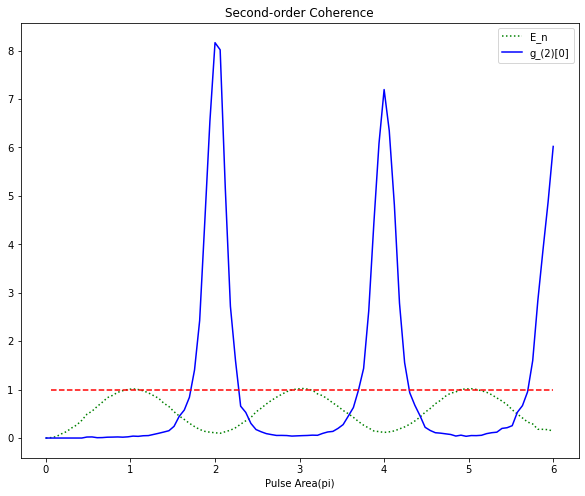

In [ ]:
g2 = [0,0]
g2.clear()

for i in range(0,len(E_n)):
  if E_n[i]==0:
    g2.append(0)
  else:
    g2.append((E_n2[i]-E_n[i])/(E_n[i]*E_n[i]))

plt.figure(figsize=(10,8))
plt.plot(possible_n, E_n, 'g', linestyle = 'dotted')
plt.plot(possible_n, g2,'b', linestyle = 'solid')
plt.plot(possible_n, possible_n/possible_n, 'r', linestyle = 'dashed')
plt.title('Second-order Coherence')
plt.xlabel('Pulse Area(pi)')
plt.legend(("E_n", "g_(2)[0]"))
plt.show()
